In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, diff,symbols 
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns

In [9]:
#set objective function 
def f_1(x1,x2):
    return 2*x1**2 + 5*x2**2 + x1*x2 - 3*x1 - x2 +5

def f_2(x1,x2):
    try: 
        a = np.cos(x1)*np.sin(x2)
    except:
        a = sp.cos(x1)*sp.sin(x2)
    return a

#  Gradient descent

In [20]:
def gradient_descent(func, x_prev, learning_rate, epsilon, max_iter):
    iter_ = 1 
    seq_x = []
    seq_y = []
    seq_f = []
    seq_diff = []
    
    x1, x2 = symbols('x1 x2')
    func_d = func(x1,x2)
    diff_x1 = diff(func_d, x1)
    diff_x2 = diff(func_d, x2)
    
   
    grad_vector = np.array([diff_x1.subs([(x1,x_prev[0]),(x2,x_prev[1])]),diff_x2.subs([(x1,x_prev[0]),(x2,x_prev[1])])], dtype=np.float64)
    x_next = np.subtract(x_prev, learning_rate*grad_vector)
  
    seq_x = np.append(seq_x, [x_prev[0],x_next[0]])
    seq_y = np.append(seq_y, [x_prev[0], x_next[1]])
    seq_f = np.append(seq_f, [func(x_prev[0],x_prev[1]), func(x_next[0],x_next[1])])


    
    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon and iter_ < max_iter:

        x_prev = x_next
        grad_vector = np.array([diff_x1.subs([(x1,x_prev[0]),(x2,x_prev[1])]),diff_x2.subs([(x1,x_prev[0]),(x2,x_prev[1])])],dtype=np.float64)
        x_next = np.subtract(x_prev, learning_rate*grad_vector)
        iter_ += 1
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
        seq_f = np.append(seq_f, func(x_next[0],x_next[1]))
        seq_diff = np.append(seq_diff, np.linalg.norm(x_next - x_prev))

    return (x_next, func(x_next[0],x_next[1]), iter_, seq_x,seq_y, seq_f, seq_diff)
   
    
    

In [21]:
gradient_res_1= gradient_descent(f_1 , np.array([1,3]), 0.05, 0.0001, 1000)

In [22]:
gradient_res_2= gradient_descent(f_2 , np.array([1,0]), 0.05, 0.0001, 1000)

# Adam's optimization 

In [26]:
def adam_optimizer(func, x_prev, leatning_rate, beta1, beta2, epsilon, precision, max_iter):
    seq_x = []
    seq_y = []
    seq_f = []
    seq_diff = []
    #initialize momentums, time step
    vd = 0
    sd = 0
    iter_ = 1
    
    x1, x2 = symbols('x1 x2')
    func_d = func(x1,x2)
    diff_x1 = diff(func_d, x1)
    diff_x2 = diff(func_d, x2)
    
    grad_vector = np.array([diff_x1.subs([(x1,x_prev[0]),(x2,x_prev[1])]),diff_x2.subs([(x1,x_prev[0]),(x2,x_prev[1])])],dtype=np.float64)
    #peform gradient descent with momentum using beta1
    vd = beta1 * vd + ((1-beta1) * grad_vector)
    #Get rms prop value on the derivative using beta2
    sd = beta2 * sd + ((1-beta2) * (grad_vector**2))
    #Add bias correction to calculated values
    vd_h = vd / (1-(beta1)**(iter_))
    sd_h = sd / (1-(beta2)**(iter_))
    #combine both RMS prop value and gradient descent momentum to get the new derivative
    nd = vd_h / np.sqrt((sd_h) + epsilon)
    # get your new value of x by adding the previous, the multiplication of the derivative and the learning rate
    x_next = np.subtract(x_prev, leatning_rate * nd)
    seq_x = np.append(seq_x, [x_prev[0],x_next[0]])
    seq_y = np.append(seq_y, [x_prev[0], x_next[1]])
    seq_f = np.append(seq_f, [func(x_prev[0],x_prev[1]), func(x_next[0],x_next[1])])
  
  
    
    while np.linalg.norm(np.subtract(x_next,x_prev)) > precision and iter_ < max_iter:
        x_prev = x_next
        grad_vector = np.array([diff_x1.subs([(x1,x_prev[0]),(x2,x_prev[1])]),diff_x2.subs([(x1,x_prev[0]),(x2,x_prev[1])])],dtype=np.float64)
        vd = beta1 * vd + ((1-beta1) * grad_vector)
        sd = beta2 * sd + ((1-beta2) * (grad_vector**2))
        vd_h = vd / (1-(beta1)**(iter_))
        sd_h = sd / (1-(beta2)**(iter_))
        nd = vd_h / np.sqrt((sd_h) + epsilon)
        x_next = np.subtract(x_prev, leatning_rate * nd)
        iter_+= 1
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
        seq_f = np.append(seq_f, func(x_next[0],x_next[1]))
        seq_diff = np.append(seq_diff, np.linalg.norm(x_next - x_prev))
    return (x_next, func(x_next[0],x_next[1]), iter_, seq_x,seq_y, seq_f,seq_diff)


In [27]:
 adam_res_1 = adam_optimizer(f_1, np.array([1,3]), 0.1, 0.9, 0.999, 10**-8, 0.0001, 1000)

In [28]:
 adam_res_2 = adam_optimizer(f_2, np.array([1,0]), 0.1, 0.9, 0.999, 10**-8, 0.0001, 1000)

# Plot

## Function 1

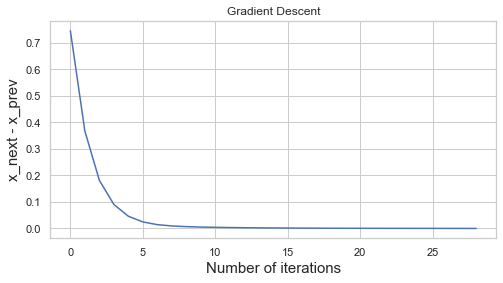

In [44]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(8, 4))
plt.plot(gradient_res_1[6])
plt.xlabel('Number of iterations',fontsize=15)
plt.ylabel('x_next - x_prev',fontsize=15)
plt.title('Gradient Descent')
plt.show()

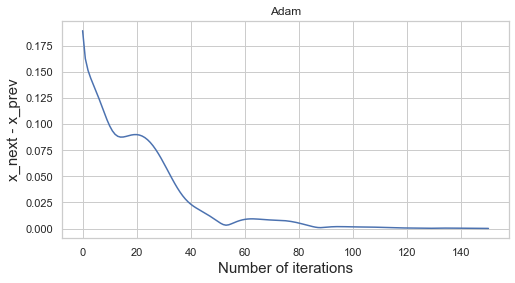

In [43]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(8, 4))
plt.plot(adam_res_1[6])
plt.xlabel('Number of iterations',fontsize=15)
plt.ylabel('x_next - x_prev',fontsize=15)
plt.title('Adam')
plt.show()

/var/folders/j_/c1mf9sp16w189s8lq8qh8ms00000gn/T/ipykernel_66400/3968905614.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d',elev=50, azim=-50)


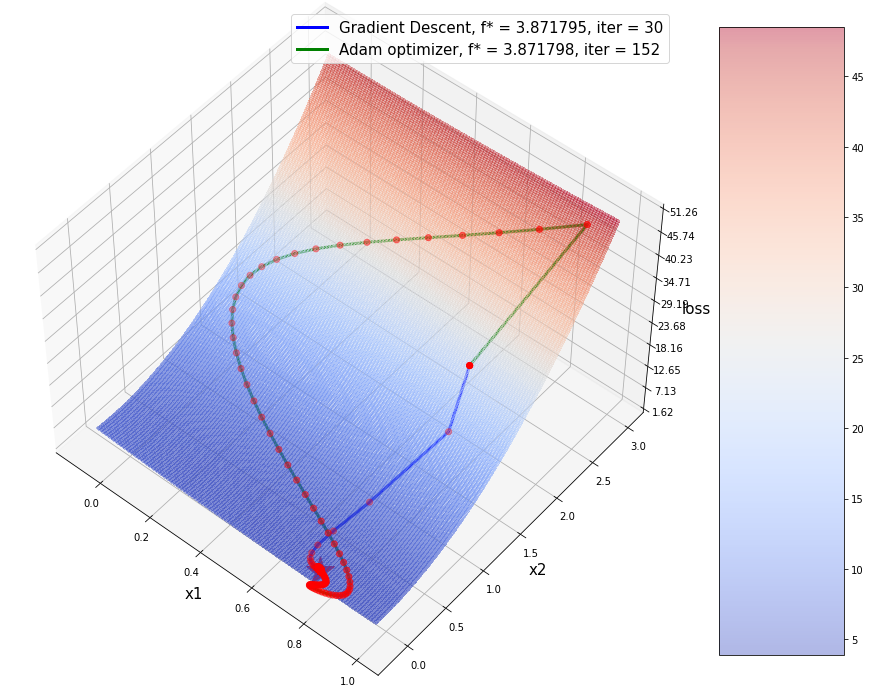

In [701]:
x = np.arange(-0.1, 1, 0.01)
y = np.arange(-0.1, 3, 0.01)


X, Y = np.meshgrid(x, y)
Z = f_1(X,Y)

fig = plt.figure(1, figsize = (15, 25))
ax = fig.gca(projection='3d',elev=50, azim=-50)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.4, edgecolor='none',
                      cmap=cm.coolwarm,linewidth=0, antialiased=False)


ax.scatter(gradient_res_1[3], gradient_res_1[4], zs = gradient_res_1[5],lw=1, c='r', s=150, marker='.')
ax.plot(gradient_res_1[3], gradient_res_1[4],  '-b',zs = gradient_res_1[5],  lw=3, 
        label=('Gradient Descent, f* = %f, iter = %d' %(gradient_res_1[1], gradient_res_1[2] )))
ax.plot(gradient_res_1[0][0], gradient_res_1[0][1],gradient_res_1[1] , 'r*', markersize=30)
ax.scatter(adam_res_1[3], adam_res_1[4], zs = adam_res_1[5],lw=1, c='r', s=150, marker='.')
ax.plot(adam_res_1[3], adam_res_1[4],  '-g', zs = adam_res_1[5],  lw=3, 
        label= ('Adam optimizer, f* = %f, iter = %d'%( adam_res_1[1],adam_res_1[2] )))

ax.legend(fontsize=15)
ax.set_xlabel('x1',fontsize=15)
ax.set_ylabel('x2',fontsize=15)
ax.set_zlabel('loss',fontsize=15)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
plt.show()


## Function 2

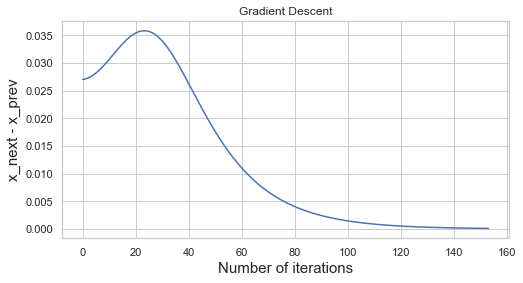

In [46]:

plt.figure(figsize=(8, 4))
plt.plot(gradient_res_2[6])
plt.xlabel('Number of iterations',fontsize=15)
plt.ylabel('x_next - x_prev',fontsize=15)
plt.title('Gradient Descent')
plt.show()

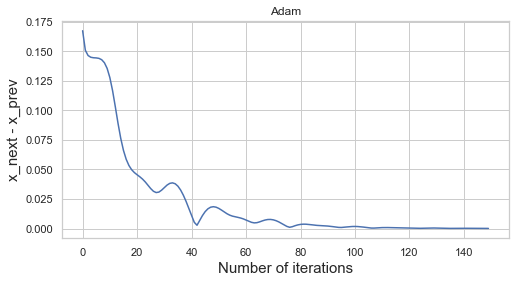

In [49]:

plt.figure(figsize=(8, 4))
plt.plot(adam_res_2[6])
plt.xlabel('Number of iterations',fontsize=15)
plt.ylabel('x_next - x_prev',fontsize=15)
plt.title('Adam')
plt.show()

/var/folders/j_/c1mf9sp16w189s8lq8qh8ms00000gn/T/ipykernel_59194/72571555.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d',elev=30, azim=-50)


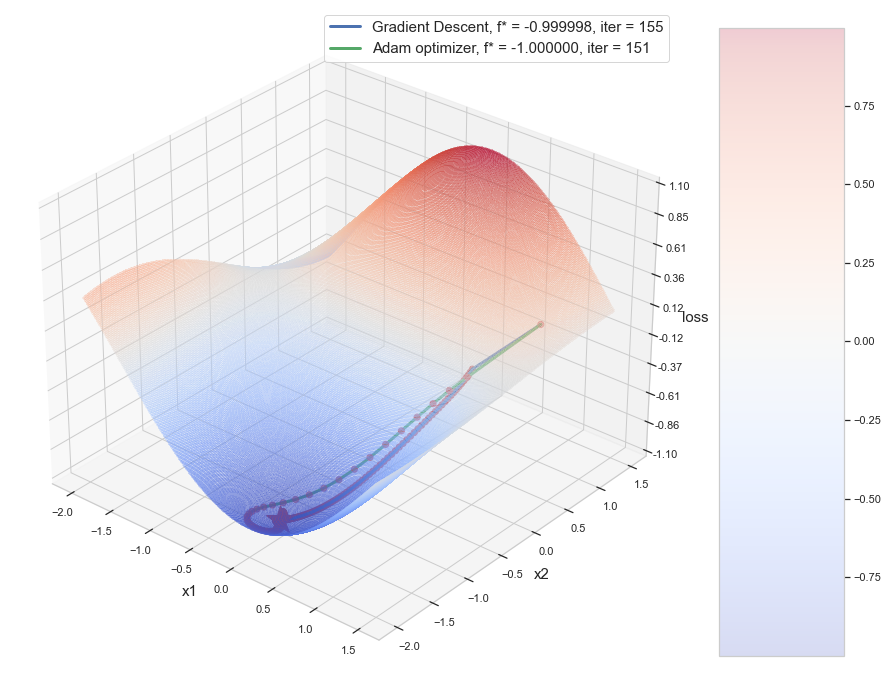

In [47]:
#x = np.arange(-0.1, 1, 0.01)
#y = np.arange(-0.1, 3, 0.01)
x = np.arange(-2, 1.5, 0.01)
y = np.arange(-2, 1.5, 0.01)

X, Y = np.meshgrid(x, y)
Z = f_2(X,Y)

fig = plt.figure(1, figsize = (15, 25))
ax = fig.gca(projection='3d',elev=30, azim=-50)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2, edgecolor='none',
                      cmap=cm.coolwarm,linewidth=0, antialiased=False)


ax.scatter(gradient_res_2[3], gradient_res_2[4], zs = gradient_res_2[5],lw=1, c='r', s=150, marker='.')
ax.plot(gradient_res_2[3], gradient_res_2[4],  '-b',zs = gradient_res_2[5],  lw=3, 
        label=('Gradient Descent, f* = %f, iter = %d' %(gradient_res_2[1], gradient_res_2[2] )))
ax.plot(gradient_res_2[0][0], gradient_res_2[0][1],gradient_res_2[1] , 'r*', markersize=30)
ax.scatter(adam_res_2[3], adam_res_2[4], zs = adam_res_2[5],lw=1, c='r', s=150, marker='.')
ax.plot(adam_res_2[3], adam_res_2[4],  '-g', zs = adam_res_2[5],  lw=3, 
        label= ('Adam optimizer, f* = %f, iter = %d'%( adam_res_2[1],adam_res_2[2] )))

ax.legend(fontsize=15)
ax.set_xlabel('x1',fontsize=15)
ax.set_ylabel('x2',fontsize=15)
ax.set_zlabel('loss',fontsize=15)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
plt.show()
